<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.171402,74.073550,0.365244,138.610195,138.206795,0.403400
1,0.0,1.0,49.008115,37.366468,-0.145374,96.229209,96.398687,-0.169479
2,0.0,2.0,41.005271,89.400832,-0.708236,139.697868,140.343866,-0.645999
3,0.0,3.0,68.582198,63.727418,-0.593001,141.716614,142.287022,-0.570408
4,0.0,4.0,93.225781,21.547679,-0.121637,124.651823,124.818584,-0.166761
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.595554,49.191935,0.119602,142.907091,142.741501,0.165590
249996,999.0,246.0,99.423948,65.653003,-0.110531,174.966421,175.010545,-0.044124
249997,999.0,247.0,44.876948,81.420192,-1.448203,134.848937,136.214546,-1.365608
249998,999.0,248.0,57.088436,98.242940,-0.740584,164.590791,165.228104,-0.637313


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.171402  74.073550  0.365244  138.610195  138.206795  0.403400
      1.0    49.008115  37.366468 -0.145374   96.229209   96.398687 -0.169479
      2.0    41.005271  89.400832 -0.708236  139.697868  140.343866 -0.645999
      3.0    68.582198  63.727418 -0.593001  141.716614  142.287022 -0.570408
      4.0    93.225781  21.547679 -0.121637  124.651823  124.818584 -0.166761
...                ...        ...       ...         ...         ...       ...
999.0 245.0  83.595554  49.191935  0.119602  142.907091  142.741501  0.165590
      246.0  99.423948  65.653003 -0.110531  174.966421  175.010545 -0.044124
      247.0  44.876948  81.420192 -1.448203  134.848937  136.214546 -1.365608
      248.0  57.088436  98.242940 -0.740584  164.590791  165.228104 -0.637313
      249.0  42.534665  67.584601 -0.541560  119.577705  120.053303 -0.475598

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.171402  74.073550  0.365244  138.610195  138.206795  0.403400
      1.0    49.008115  37.366468 -0.145374   96.229209   96.398687 -0.169479
      2.0    41.005271  89.400832 -0.708236  139.697868  140.343866 -0.645999
      3.0    68.582198  63.727418 -0.593001  141.716614  142.287022 -0.570408
      4.0    93.225781  21.547679 -0.121637  124.651823  124.818584 -0.166761
...                ...        ...       ...         ...         ...       ...
999.0 245.0  83.595554  49.191935  0.119602  142.907091  142.741501  0.165590
      246.0  99.423948  65.653003 -0.110531  174.966421  175.010545 -0.044124
      247.0  44.876948  81.420192 -1.448203  134.848937  136.214546 -1.365608
      248.0  57.088436  98.242940 -0.740584  164.590791  165.228104 -0.637313
      249.0  42.534665  67.584601 -0.541560  119.577705  120.053303 -0.475598

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.171402,74.073550,0.365244,138.610195,138.206795,0.403400
1,0.0,1.0,49.008115,37.366468,-0.145374,96.229209,96.398687,-0.169479
2,0.0,2.0,41.005271,89.400832,-0.708236,139.697868,140.343866,-0.645999
3,0.0,3.0,68.582198,63.727418,-0.593001,141.716614,142.287022,-0.570408
4,0.0,4.0,93.225781,21.547679,-0.121637,124.651823,124.818584,-0.166761
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.595554,49.191935,0.119602,142.907091,142.741501,0.165590
249996,999.0,246.0,99.423948,65.653003,-0.110531,174.966421,175.010545,-0.044124
249997,999.0,247.0,44.876948,81.420192,-1.448203,134.848937,136.214546,-1.365608
249998,999.0,248.0,57.088436,98.242940,-0.740584,164.590791,165.228104,-0.637313


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.171402  74.073550  0.365244  138.610195  138.206795  0.403400
      1.0    49.008115  37.366468 -0.145374   96.229209   96.398687 -0.169479
      2.0    41.005271  89.400832 -0.708236  139.697868  140.343866 -0.645999
      3.0    68.582198  63.727418 -0.593001  141.716614  142.287022 -0.570408
      4.0    93.225781  21.547679 -0.121637  124.651823  124.818584 -0.166761
...                ...        ...       ...         ...         ...       ...
999.0 245.0  83.595554  49.191935  0.119602  142.907091  142.741501  0.165590
      246.0  99.423948  65.653003 -0.110531  174.966421  175.010545 -0.044124
      247.0  44.876948  81.420192 -1.448203  134.848937  136.214546 -1.365608
      248.0  57.088436  98.242940 -0.740584  164.590791  165.228104 -0.637313
      249.0  42.534665  67.584601 -0.541560  119.577705  120.053303 -0.475598

[250000 rows x 6 columns]

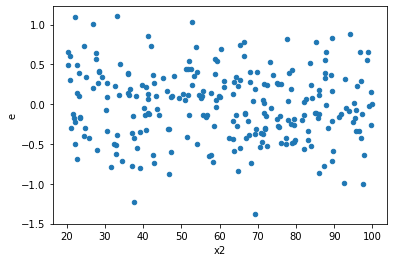

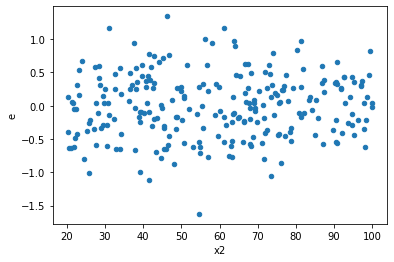

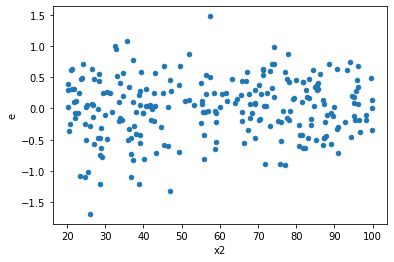

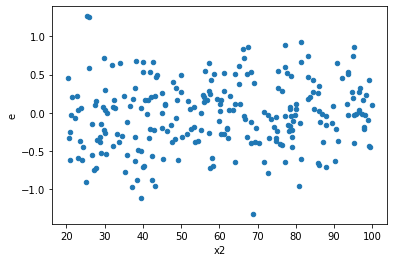

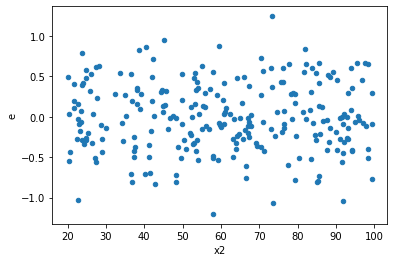

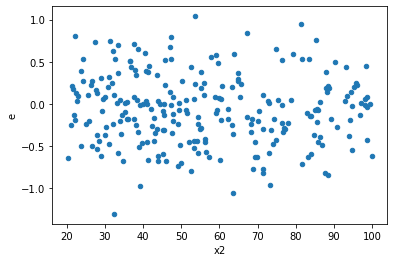

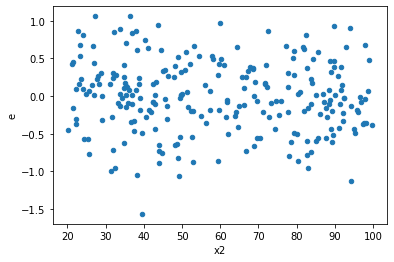

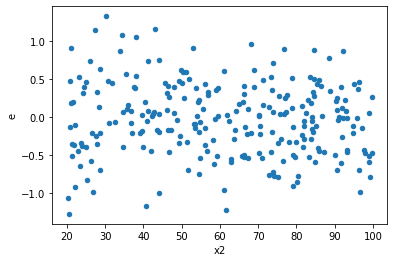

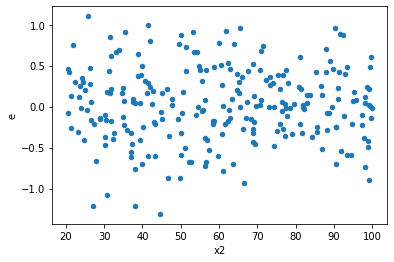

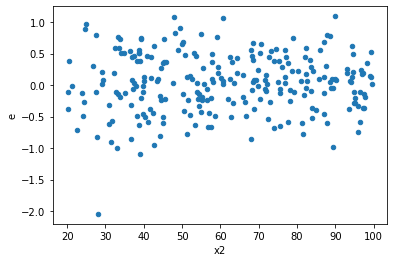

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,141.0,105.0,28.09224322209403,27.089892870070372,0.19923576753258176,0.25799897971495594,1.2949430863249212,0.16292549142815127,0.9185372542859244,0.08146274571407564,Reject001=1 : Homoscedasticity
3.0,124.0,122.0,22.528251022635896,24.205394441682554,0.18167944373093464,0.19840487247280783,1.0920601054164574,0.6264599472972994,0.6867700263513503,0.3132299736486497,Reject001=1 : Homoscedasticity
4.0,101.0,145.0,17.798652614301826,26.613817890892648,0.17622428330991907,0.1835435716613286,1.0415339374003147,0.815941023978352,0.592029488010824,0.407970511989176,Reject001=1 : Homoscedasticity
6.0,114.0,132.0,22.70271290120805,31.59397380881172,0.19914660439656184,0.23934828643039183,1.2018697841002406,0.3073336428538975,0.8463331785730512,0.15366682142694876,Reject001=1 : Homoscedasticity
8.0,111.0,135.0,18.673634023084492,30.986506225453837,0.16823093714490533,0.2295296757441025,1.3643725680871506,0.08501475316736928,0.9574926234163154,0.04250737658368464,Reject001=1 : Homoscedasticity
9.0,148.0,98.0,28.727834580789352,24.492587786888944,0.19410699041073887,0.24992436517233615,1.287559838228831,0.17905404397965397,0.910472978010173,0.08952702198982698,Reject001=1 : Homoscedasticity
11.0,117.0,129.0,25.44791994859673,29.38743974668409,0.21750358930424557,0.22780961043941156,1.0473832232752254,0.7957008646150356,0.6021495676924822,0.3978504323075178,Reject001=1 : Homoscedasticity
12.0,142.0,104.0,22.382099046223907,26.40515783618646,0.15762041581847822,0.25389574842486984,1.610804965248068,0.01064315973656349,0.9946784201317183,0.005321579868281745,Reject001=1 : Homoscedasticity
15.0,138.0,108.0,24.286990058388476,22.96060738724909,0.17599268158252518,0.2125982165486027,1.2079946429415176,0.3049918444173416,0.8475040777913292,0.1524959222086708,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,112.0,134.0,23.541719207430738,25.062108468009953,0.2101939214949173,0.1870306602090295,0.8898005179162713,0.5242256226958714,Reject001=1 : Homoscedasticity
1.0,141.0,105.0,28.09224322209403,27.089892870070372,0.19923576753258176,0.25799897971495594,1.2949430863249212,0.16292549142815127,Reject001=1 : Homoscedasticity
2.0,111.0,135.0,31.793619551687975,23.352231896358457,0.28642900497016194,0.17297949552858116,0.6039175241578656,0.006234636953986478,Reject001=0 : Heteroscedasticity
3.0,124.0,122.0,22.528251022635896,24.205394441682554,0.18167944373093464,0.19840487247280783,1.0920601054164574,0.6264599472972994,Reject001=1 : Homoscedasticity
4.0,101.0,145.0,17.798652614301826,26.613817890892648,0.17622428330991907,0.1835435716613286,1.0415339374003147,0.815941023978352,Reject001=1 : Homoscedasticity
5.0,123.0,123.0,20.5295653749975,20.33532490306242,0.16690703556908537,0.1653278447403449,0.9905385005290156,0.9580432868309445,Reject001=1 : Homoscedasticity
6.0,114.0,132.0,22.70271290120805,31.59397380881172,0.19914660439656184,0.23934828643039183,1.2018697841002406,0.3073336428538975,Reject001=1 : Homoscedasticity
7.0,122.0,124.0,31.005805164412784,24.65558719245045,0.2541459439705966,0.19883538058427783,0.7823669246017244,0.17524513636463177,Reject001=1 : Homoscedasticity
8.0,111.0,135.0,18.673634023084492,30.986506225453837,0.16823093714490533,0.2295296757441025,1.3643725680871506,0.08501475316736928,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      935
Reject001=0 : Heteroscedasticity     65
Name: Result_test, dtype: int64